# I. EDA

## I.I> Training Data

### 1> Load the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline
import re

In [3]:
# Load the dataset
df = pd.read_csv("./train.csv")
df.head()

,TransactionNumber,UserID,Age,Gender,Occupation,EducationLevel,MaritalStatus,NumDependents,Income,Expenditure,...,MerchantID,TransactionType,TransactionLocation,DeviceType,Latitude,Longitude,EmailDomain,Terrorism,UserTenure,IsFraud
0,8765,70,37,Female,Professional,Bachelor,Widowed,3,28884.43 AUD,14610.61 AUD,...,M006,Withdrawal,Adelaide,Mobile,-31.840233,145.612793,jon44@disposable.com,False,113,1
1,9645,3386,34,Male,Student,High School,Married,4,AU$ 54919.07,39169.49 AUD,...,M002,Withdrawal,Canberra,Mobile,-37.020100,144.964600,emilyreese@gmail.com,False,104,1
2,1145,2971,25,Male,Unemployed,Master,Married,2,AU$ 74728.57,55873.76 AUD,...,M008,Purchase,Brisbane,Mobile,-31.840233,145.612793,fordevan@gmail.com,False,105,0
3,15308,2925,25,Male,Professional,High School,Married,3,AU$ 55712.62,AED 89649.04,...,M001,Purchase,Darwin,iphone 15,-37.020100,144.964600,kathleenlewis@tempmail.com,False,70,1
4,14967,2339,38,Male,Professional,High School,Single,4,53004.7 AUD,AED 43601.02,...,M001,Withdrawal,MLB,Tablet,-37.020100,144.964600,kristinawhite@gmail.com,False,27,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10966 entries, 0 to 10965
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionNumber    10966 non-null  int64  
 1   UserID               10966 non-null  int64  
 2   Age                  10966 non-null  int64  
 3   Gender               10966 non-null  object 
 4   Occupation           10966 non-null  object 
 5   EducationLevel       10966 non-null  object 
 6   MaritalStatus        10966 non-null  object 
 7   NumDependents        10966 non-null  int64  
 8   Income               10966 non-null  object 
 9   Expenditure          10966 non-null  object 
 10  GiftsTransaction     10966 non-null  object 
 11  TransactionDate      10966 non-null  object 
 12  TransactionTime      10966 non-null  object 
 13  TransactionAmount    10966 non-null  object 
 14  MerchantID           10966 non-null  object 
 15  TransactionType      10966 non-null 

There are many columns that should be numeric data, and considered as object. Thus, data conversion is required.

In [6]:
df.describe()

,TransactionNumber,UserID,Age,NumDependents,Latitude,Longitude,UserTenure,IsFraud
count,10966.000000,10966.000000,10966.000000,10966.000000,10923.000000,10923.000000,10966.000000,10966.000000
mean,9117.500091,2483.885282,2751.845887,1.995714,-30.363255,141.254786,60.786157,0.364308
std,5293.669640,1429.402615,9730.988917,1.408035,6.962819,11.268395,34.254477,0.481257
min,1.000000,1.000000,-68.000000,0.000000,-41.640079,-112.026050,1.000000,0.000000
25%,4516.250000,1253.000000,26.000000,1.000000,-37.020100,142.702789,31.000000,0.000000
50%,9120.500000,2471.000000,34.000000,2.000000,-31.840233,144.964600,61.000000,0.000000
75%,13710.750000,3727.000000,43.000000,3.000000,-25.042261,145.612793,90.000000,1.000000
max,18277.000000,5000.000000,67000.000000,4.000000,57.851580,149.012375,119.000000,1.000000


At a glance, Age would have outliers since the min and max are not reasonable 

## 2> Null values check

In [9]:
df.isnull().sum()

TransactionNumber       0
UserID                  0
Age                     0
Gender                  0
Occupation              0
EducationLevel          0
MaritalStatus           0
NumDependents           0
Income                  0
Expenditure             0
GiftsTransaction        0
TransactionDate         0
TransactionTime         0
TransactionAmount       0
MerchantID              0
TransactionType         0
TransactionLocation     0
DeviceType              0
Latitude               43
Longitude              43
EmailDomain             0
Terrorism               0
UserTenure              0
IsFraud                 0
dtype: int64

In [10]:
df = df.dropna()

## 3> Check duplicate and data validity

In [12]:
# Check valid email

def check_valid_email(email):
    email = email.strip()
    regex = r'^[a-z0-9]+[\._]?[a-z0-9]+[@]\w+[.]\w+$'
    if re.match(regex, email):
        return email

    else:
        return "not an email"

df['EmailDomain'].apply(check_valid_email)

# Count the number of not-an-email value
mask = df['EmailDomain'] == "not an email"
count = len(df[mask])
print(count)

0


In [13]:
df['TransactionNumber'].duplicated().sum()

0

In [14]:
df.duplicated().sum()

0

In [15]:
df['IsFraud'].value_counts()

IsFraud
0    6938
1    3985
Name: count, dtype: int64

All emails are in the correct format and transactions are not duplicate

## 4> Handling categorical data

In [18]:
# Data validity check: Gender
df['Gender'].value_counts()

Gender
Male           4860
Female         4418
isnotfemale     288
he              266
man             262
fem             220
she             207
woman           205
isnotmale       197
Name: count, dtype: int64

In [19]:
# Fix the incorrect values
gender_correction = {"isnotfemale": "Male", "he": "Male", "he": "Male", "man": "Male", "man": "Male","fem": "Female", "she":"Female","woman":"Female","isnotmale":"Female"}
df['Gender']=df['Gender'].replace(gender_correction)
df['Gender'].value_counts()

Gender
Male      5676
Female    5247
Name: count, dtype: int64

In [20]:
# Onehot encoding: Gender
code_gender = pd.get_dummies(df[["Gender"]], dtype = int, drop_first = True)
df = df.join([code_gender])
df = df.drop(columns = "Gender").reset_index(drop = True)

In [21]:
# Data validity check: Occupation
df['Occupation'].value_counts()

Occupation
Professional    5356
Student         3316
Unemployed      1146
Retired         1105
Name: count, dtype: int64

In [22]:
# Onehot encoding: Occupation
code_occupation = pd.get_dummies(df[["Occupation"]], dtype = int, drop_first = True)
df = df.join([code_occupation])
df = df.drop(columns = "Occupation").reset_index(drop = True)

In [23]:
# Data validity check: Education Level
df["EducationLevel"].value_counts()

EducationLevel
Bachelor       4344
High School    4314
Master         1638
PhD             627
Name: count, dtype: int64

In [24]:
# Education Level (ordinal value)
df["EducationLevel"] = df["EducationLevel"].replace({"High School": 0,"Bachelor":1, "Master":2,"PhD":3})

In [25]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     5337
Single      4410
Divorced     625
Widowed      551
Name: count, dtype: int64

In [26]:
# Onehot encoding: Marital Status
code_marital_status = pd.get_dummies(df[["MaritalStatus"]], dtype = int, drop_first = True)
df = df.join([code_marital_status])
df = df.drop(columns = "MaritalStatus").reset_index(drop = True)

In [27]:
# Fix incorrect values: TransactionLocation
df["TransactionLocation"]=df["TransactionLocation"].str.upper()

mapping = {"MELB":"MELBOURNE", "MEL":"MELBOURNE", "MLB":"MELBOURNE", "MELBURN" : "MELBOURNE",
           "BNE":"BRISBANE", 
           "DRW": "DARWIN",
           "CBR":"CANBERRA",
           "PTH":"PERTH",
           "SYD":"SYDNEY",
           "ADL":"ADELAIDE", "ADELAIDE CITY":"ADELAIDE",
           "HBT":"HOBART"}

df["TransactionLocation"] = df["TransactionLocation"].replace(mapping)

code_TransactionLocation = pd.get_dummies(df[["TransactionLocation"]], dtype = int, drop_first = True)
df = df.join([code_TransactionLocation])
df = df.drop(columns = "TransactionLocation").reset_index(drop = True)

In [28]:
# Fix incorrect value: Device Type
df["DeviceType"] = df["DeviceType"].replace({"galaxys7": "Mobile","iphone 15":"Mobile", "android":"Mobile","smartphone":"Mobile","mob":"Mobile"})

# Onehot Encoding: Device Type
code_DeviceType = pd.get_dummies(df[["DeviceType"]], dtype = int, drop_first = True)
df = df.join([code_DeviceType])
df = df.drop(columns = "DeviceType").reset_index(drop = True)

In [29]:
# Onehot Encoding: Transaction Type
code_transaction_type = pd.get_dummies(df[["TransactionType"]], dtype = int, drop_first = True)
df = df.join([code_transaction_type])
df = df.drop(columns = "TransactionType").reset_index(drop = True)

## 5> Handling numeric data

Since all the data have currency symbols and inconsistent type, we convert all of them into correct data type with consistent currency under AUD

In [32]:
# Income, Expenditure, GiftsTransaction, TransactionAmount

# GiftsTransaction
df[['first_value', 'second_value']] = df["GiftsTransaction"].str.split(' ', expand=True)
    
df["first_value_len"] = df["first_value"].apply(lambda s:len(s))
df["second_value_len"] = df["second_value"].apply(lambda s:len(s))
    
    # function to get monetary symbol
def get_monetary_symbol(row):
    if row['first_value_len'] == 1:
        return row['first_value']
    elif row['first_value'] == "AU$":
        return row['first_value']
    elif row['first_value'] == "AED":
        return row['first_value']
    elif row['second_value'] == "GBP":
        return row['second_value']
    elif row['second_value'] == "AUD":
        return row['second_value']
    else:
        return None
    
df["monetary_symbol"] = df.apply(get_monetary_symbol, axis=1)
    
    # function to get monetary value
def get_monetary_value(row):
    if row['first_value'] == row["monetary_symbol"]:
        return row['second_value']
    else:
        return row['first_value']
            
df["monetary_value"] = df.apply(get_monetary_value, axis=1)

df["monetary_value"] = df["monetary_value"].astype("float")
    
    # function to convert to AUD
def get_exchange_rate(row):
    if row['monetary_symbol'] == "£":
        return 1.96
    elif row['monetary_symbol'] == "GBP":
        return 1.96
    elif row['monetary_symbol'] == "AED":
        return 0.41
    else:
        return 1
    
df["exchange_rate"] = df.apply(get_exchange_rate, axis=1)
    
df["GiftsTransaction_AUD_equivalent"] = df["exchange_rate"]*df["monetary_value"]
    
df = df.drop(columns = ["first_value_len", "second_value_len", 'first_value', 'second_value', "exchange_rate", "monetary_symbol","monetary_value"]).reset_index(drop = True)

In [33]:
# Income, Expenditure, GiftsTransaction, Transaction Amount

# Income
df[['first_value', 'second_value']] = df["Income"].str.split(' ', expand=True)
    
df["first_value_len"] = df["first_value"].apply(lambda s:len(s))
df["second_value_len"] = df["second_value"].apply(lambda s:len(s))
    
    # function to get monetary symbol
def get_monetary_symbol(row):
    if row['first_value_len'] == 1:
        return row['first_value']
    elif row['first_value'] == "AU$":
        return row['first_value']
    elif row['first_value'] == "AED":
        return row['first_value']
    elif row['second_value'] == "GBP":
        return row['second_value']
    elif row['second_value'] == "AUD":
        return row['second_value']
    else:
        return None
    
df["monetary_symbol"] = df.apply(get_monetary_symbol, axis=1)
    
    # function to get monetary value
def get_monetary_value(row):
    if row['first_value'] == row["monetary_symbol"]:
        return row['second_value']
    else:
        return row['first_value']
            
df["monetary_value"] = df.apply(get_monetary_value, axis=1)

df["monetary_value"] = df["monetary_value"].astype("float")
    
    # function to convert to AUD
def get_exchange_rate(row):
    if row['monetary_symbol'] == "£":
        return 1.96
    elif row['monetary_symbol'] == "GBP":
        return 1.96
    elif row['monetary_symbol'] == "AED":
        return 0.41
    else:
        return 1
    
df["exchange_rate"] = df.apply(get_exchange_rate, axis=1)
    
df["Income_AUD_equivalent"] = df["exchange_rate"]*df["monetary_value"]
    
df = df.drop(columns = ["first_value_len", "second_value_len", 'first_value', 'second_value', "exchange_rate", "monetary_symbol","monetary_value"]).reset_index(drop = True)

In [34]:
# Income, Expenditure, GiftsTransaction, TransactionAmount

# Expenditure
df[['first_value', 'second_value']] = df["Expenditure"].str.split(' ', expand=True)
    
df["first_value_len"] = df["first_value"].apply(lambda s:len(s))
df["second_value_len"] = df["second_value"].apply(lambda s:len(s))
    
    # function to get monetary symbol
def get_monetary_symbol(row):
    if row['first_value_len'] == 1:
        return row['first_value']
    elif row['first_value'] == "AU$":
        return row['first_value']
    elif row['first_value'] == "AED":
        return row['first_value']
    elif row['second_value'] == "GBP":
        return row['second_value']
    elif row['second_value'] == "AUD":
        return row['second_value']
    else:
        return None
    
df["monetary_symbol"] = df.apply(get_monetary_symbol, axis=1)
    
    # function to get monetary value
def get_monetary_value(row):
    if row['first_value'] == row["monetary_symbol"]:
        return row['second_value']
    else:
        return row['first_value']
            
df["monetary_value"] = df.apply(get_monetary_value, axis=1)

df["monetary_value"] = df["monetary_value"].astype("float")
    
    # function to convert to AUD
def get_exchange_rate(row):
    if row['monetary_symbol'] == "£":
        return 1.96
    elif row['monetary_symbol'] == "GBP":
        return 1.96
    elif row['monetary_symbol'] == "AED":
        return 0.41
    else:
        return 1
    
df["exchange_rate"] = df.apply(get_exchange_rate, axis=1)
    
df["Expenditure_AUD_equivalent"] = df["exchange_rate"]*df["monetary_value"]
    
df = df.drop(columns = ["first_value_len", "second_value_len", 'first_value', 'second_value', "exchange_rate", "monetary_symbol","monetary_value"]).reset_index(drop = True)

In [35]:
# Income, Expenditure, GiftsTransaction, TransactionAmount

# TransactionAmount
df[['first_value', 'second_value']] = df["TransactionAmount"].str.split(' ', expand=True)
    
df["first_value_len"] = df["first_value"].apply(lambda s:len(s))
df["second_value_len"] = df["second_value"].apply(lambda s:len(s))
    
    # function to get monetary symbol
def get_monetary_symbol(row):
    if row['first_value_len'] == 1:
        return row['first_value']
    elif row['first_value'] == "AU$":
        return row['first_value']
    elif row['first_value'] == "AED":
        return row['first_value']
    elif row['second_value'] == "GBP":
        return row['second_value']
    elif row['second_value'] == "AUD":
        return row['second_value']
    else:
        return None
    
df["monetary_symbol"] = df.apply(get_monetary_symbol, axis=1)
    
    # function to get monetary value
def get_monetary_value(row):
    if row['first_value'] == row["monetary_symbol"]:
        return row['second_value']
    else:
        return row['first_value']
            
df["monetary_value"] = df.apply(get_monetary_value, axis=1)

df["monetary_value"] = df["monetary_value"].astype("float")
    
    # function to convert to AUD
def get_exchange_rate(row):
    if row['monetary_symbol'] == "£":
        return 1.96
    elif row['monetary_symbol'] == "GBP":
        return 1.96
    elif row['monetary_symbol'] == "AED":
        return 0.41
    else:
        return 1
    
df["exchange_rate"] = df.apply(get_exchange_rate, axis=1)
    
df["TransactionAmount_AUD_equivalent"] = df["exchange_rate"]*df["monetary_value"]
    
df = df.drop(columns = ["first_value_len", "second_value_len", 'first_value', 'second_value', "exchange_rate", "monetary_symbol","monetary_value"]).reset_index(drop = True)

In [36]:
# Drop the original columns to prevent confusion
df = df.drop(columns = ["GiftsTransaction", "Income", 'Expenditure', 'TransactionAmount']).reset_index(drop = True)

## 6> Handling date time

In [38]:
# Transaction date, Transaction time

# Convert Transaction date
df["TransactionDate"] =pd.to_datetime(df["TransactionDate"])
# Separate into year, month, day
df['Year'] = df['TransactionDate'].dt.year
df['Month'] = df['TransactionDate'].dt.month
df['Day'] = df['TransactionDate'].dt.day

#Convert Transaction time
def standardize_time(time):
    # Remove extra characters and whitespace
    time = time.strip()
    # Handle the "/" 
    if "/" in time:
        time = time.replace("/", ":")
    # Handle AM/PM format
    if time[-2:] in ['AM', 'PM']:
        return pd.to_datetime(time, format='%I:%M:%S %p').strftime('%H:%M:%S')
    else:
        return pd.to_datetime(time, format='%H:%M:%S').strftime('%H:%M:%S')

# Assuming your DataFrame is named 'df' and the column is 'TransactionTime'
df['TransactionTime'] = df['TransactionTime'].apply(standardize_time)


## 7> Handling outliers

#### 7.1> Detecting outliers

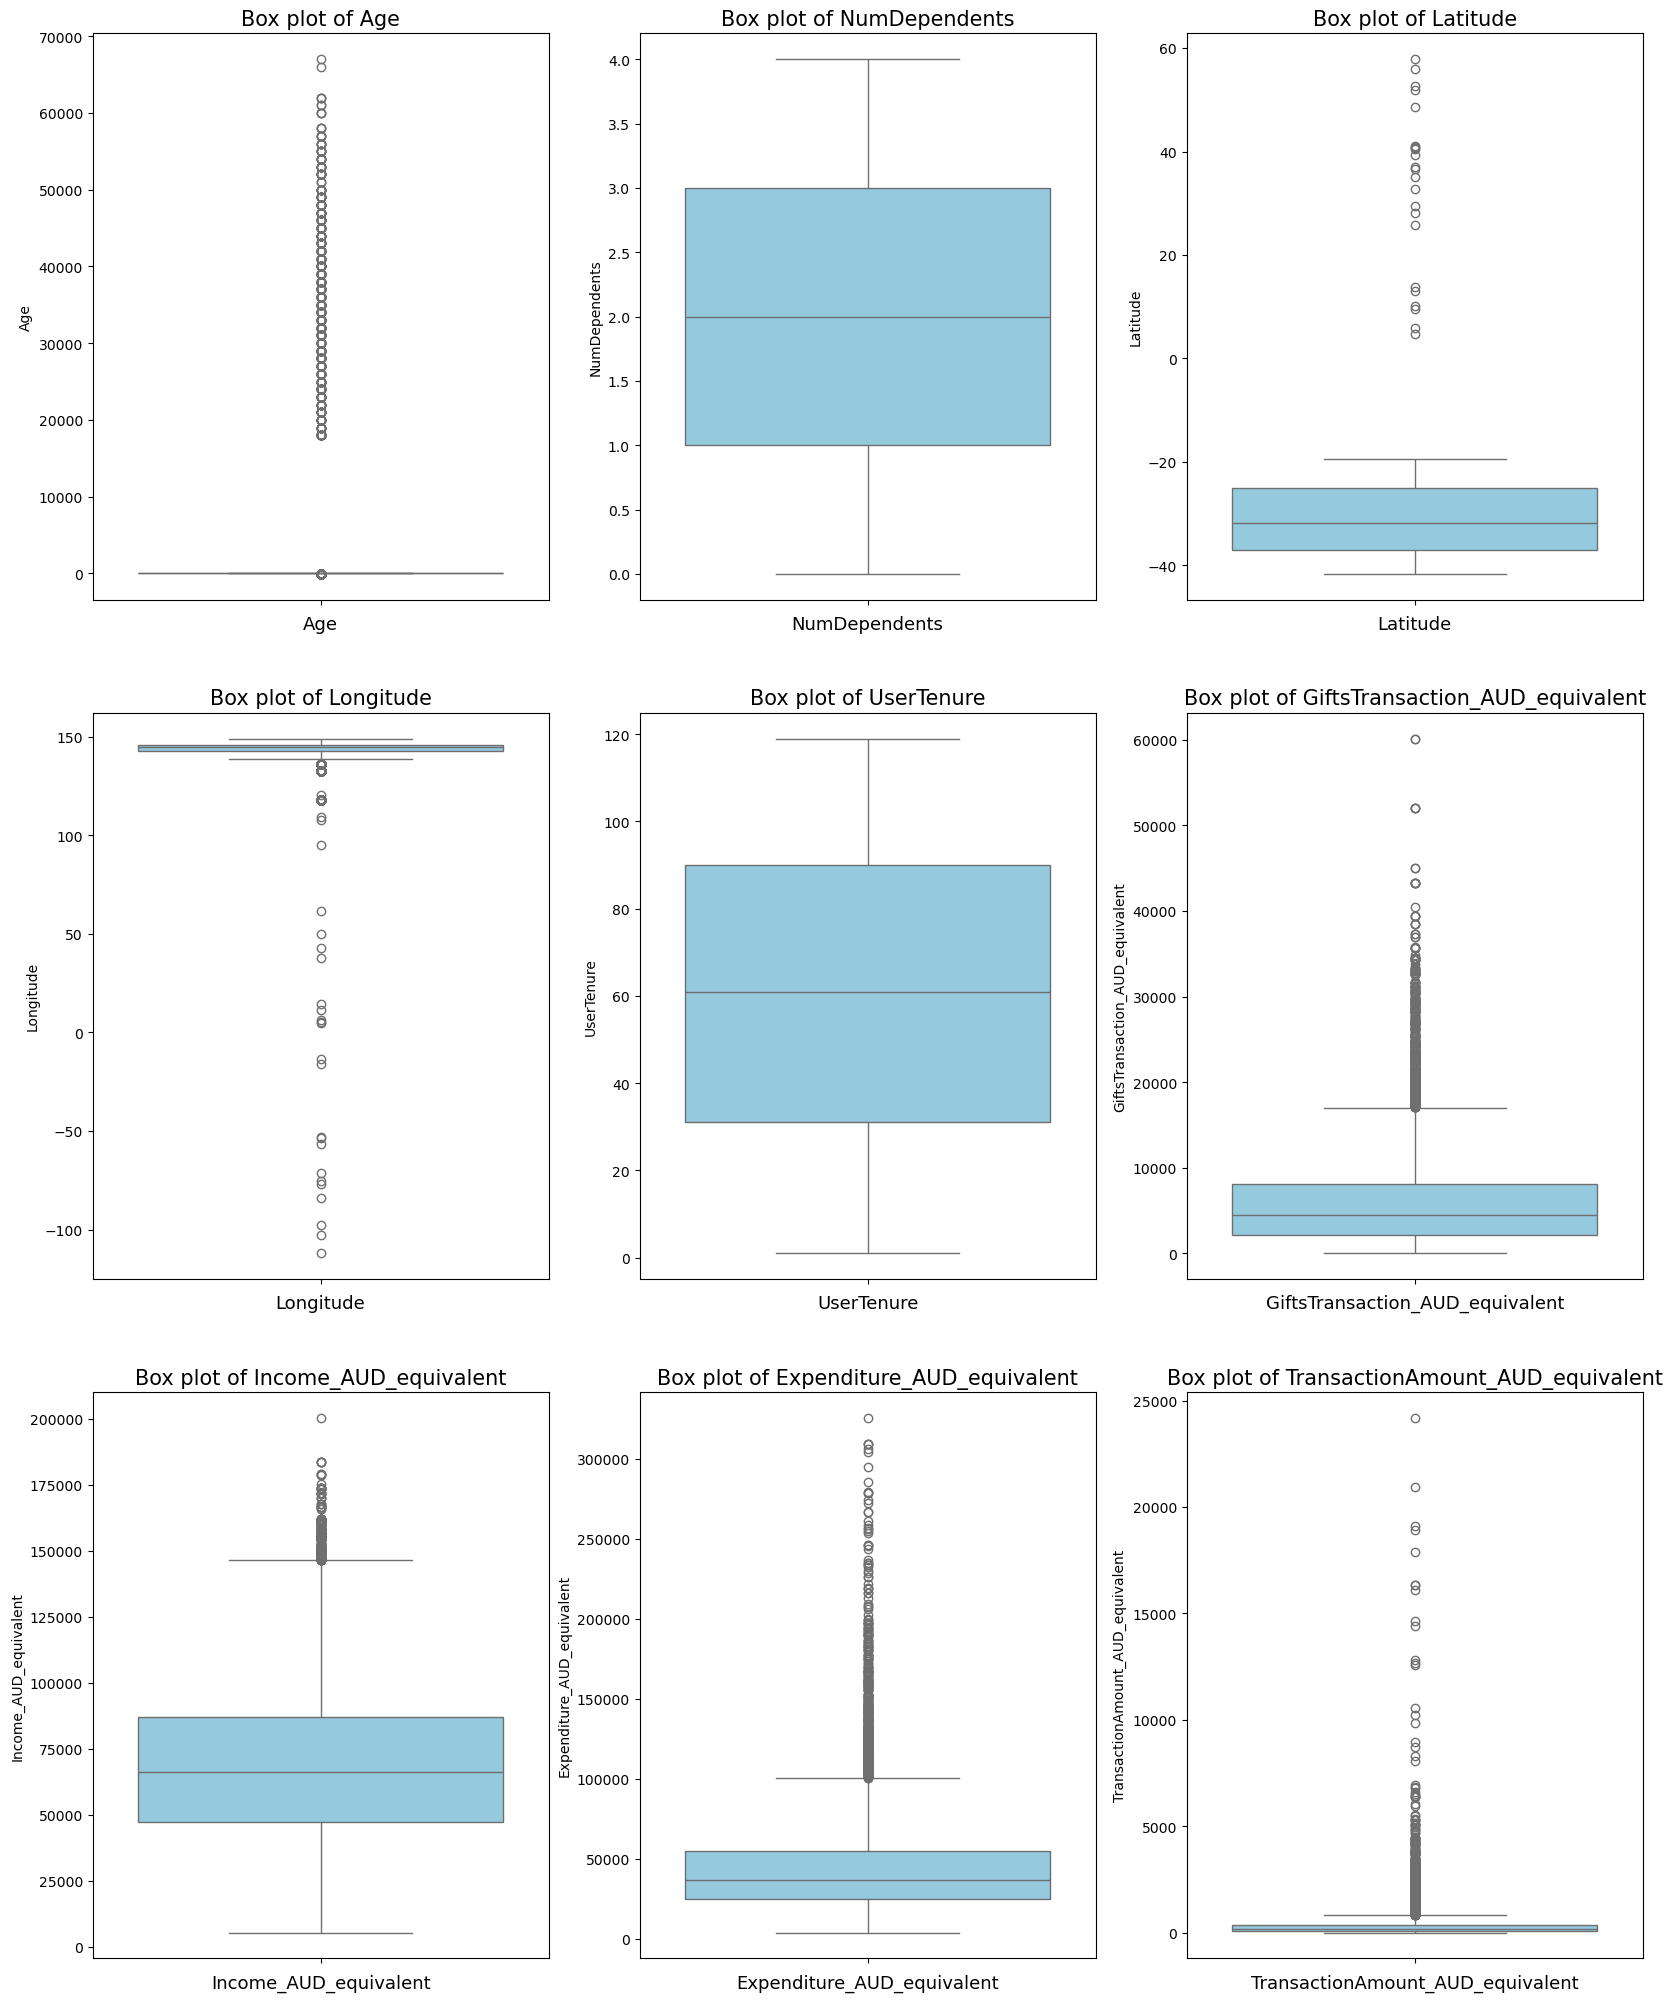

In [41]:
# Detect outliers 
plt.figure(figsize=(20,25))

# List of columns to plot
columns1 = ['Age', 'NumDependents', 'Latitude', 'Longitude', 'UserTenure', 'GiftsTransaction_AUD_equivalent', 'Income_AUD_equivalent', 'Expenditure_AUD_equivalent', 'TransactionAmount_AUD_equivalent']

# Loop through each column and create a boxplot
for i, col in enumerate(columns1):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=df[col], color="skyblue")
    plt.xlabel(col, size=13)
    plt.title(f"Box plot of {col}", size=15)

In [42]:
# Define the number of outliers
def detect_outliers (df, col):
    # calculate 25th  of the feature
    q1 = df[col].quantile(0.25)
    # caluclate 75th percentile of feature
    q3 = df[col].quantile(0.75)
    # Calculate interquartile range
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    number_outliers = df[(df[col] > upper_bound) | (df[col] < lower_bound)].shape[0]
    return number_outliers

for col in columns1:
    outliers = detect_outliers(df, col)
    print(f"The number of {col} outliers: {outliers}")

The number of Age outliers: 1735
The number of NumDependents outliers: 0
The number of Latitude outliers: 23
The number of Longitude outliers: 1772
The number of UserTenure outliers: 0
The number of GiftsTransaction_AUD_equivalent outliers: 646
The number of Income_AUD_equivalent outliers: 220
The number of Expenditure_AUD_equivalent outliers: 526
The number of TransactionAmount_AUD_equivalent outliers: 1066


- No outlier in NumDependents and UserTenure.
- Latitude, GiftsTransaction_AUD_equivalent, Income_AUD_equivalent, Expenditure_AUD_equivalent are columns with small number of outliers (less than 10% of the dataset)
- Age, Longitude, and TransactionAmount_AUD_equivalent are columns with larger number of outliers (more than 10% but less than 20% of the dataset)

#### 7.2> Handling outliers

In [45]:
# Replace Age with median

# Longtitude



## 8> Exploring data with graphs

## 9> Conclusion for EDA

In [48]:
df.shape

(10923, 40)

In [49]:
df.describe()

,TransactionNumber,UserID,Age,EducationLevel,NumDependents,TransactionDate,Latitude,Longitude,UserTenure,IsFraud,...,TransactionType_Purchase,TransactionType_Transfer,TransactionType_Withdrawal,GiftsTransaction_AUD_equivalent,Income_AUD_equivalent,Expenditure_AUD_equivalent,TransactionAmount_AUD_equivalent,Year,Month,Day
count,10923.000000,10923.000000,10923.000000,10923.000000,10923.000000,10923,10923.000000,10923.000000,10923.000000,10923.000000,...,10923.000000,10923.000000,10923.000000,10923.000000,10923.000000,10923.000000,10923.000000,10923.0,10923.000000,10923.000000
mean,9121.296347,2481.995331,2748.755928,0.869816,1.997620,2023-08-22 07:13:35.709969920,-30.363255,141.254786,60.744301,0.364827,...,0.495926,0.204706,0.196924,6187.329031,71054.355339,44796.388939,374.888877,2023.0,8.190332,16.331960
min,1.000000,1.000000,-68.000000,0.000000,0.000000,2023-01-01 00:00:00,-41.640079,-112.026050,1.000000,0.000000,...,0.000000,0.000000,0.000000,4.174800,5229.820000,3813.530000,1.730000,2023.0,1.000000,1.000000
25%,4522.500000,1252.500000,26.000000,0.000000,1.000000,2023-06-07 00:00:00,-37.020100,142.702789,31.000000,0.000000,...,0.000000,0.000000,0.000000,2193.396800,47138.510000,24662.409000,59.535000,2023.0,6.000000,9.000000
50%,9121.000000,2463.000000,34.000000,1.000000,2.000000,2023-09-15 00:00:00,-31.840233,144.964600,61.000000,0.000000,...,0.000000,0.000000,0.000000,4444.907600,66050.810000,36961.900000,156.310000,2023.0,9.000000,17.000000
75%,13716.500000,3725.500000,43.000000,1.000000,3.000000,2023-11-19 00:00:00,-25.042261,145.612793,90.000000,1.000000,...,1.000000,0.000000,0.000000,8125.764600,86880.540000,54980.759350,377.103100,2023.0,11.000000,24.000000
max,18277.000000,5000.000000,67000.000000,3.000000,4.000000,2023-12-30 00:00:00,57.851580,149.012375,119.000000,1.000000,...,1.000000,1.000000,1.000000,60150.400000,200354.470000,325600.570000,24180.918500,2023.0,12.000000,31.000000
std,5293.617927,1429.064053,9725.332418,0.870422,1.409413,NaN,6.962819,11.268395,34.257223,0.481404,...,0.500006,0.403505,0.397693,5951.741701,31320.083281,31161.609685,853.613759,0.0,3.342135,8.781016


## I.II> Testing data

In [51]:
df_test = pd.read_csv("./test.csv")
df_test.head()

,TransactionNumber,UserID,Age,Gender,Occupation,EducationLevel,MaritalStatus,NumDependents,Income,Expenditure,...,TransactionAmount,MerchantID,TransactionType,TransactionLocation,DeviceType,Latitude,Longitude,EmailDomain,Terrorism,UserTenure
0,11854,963,35,man,Student,Bachelor,Single,4,53733.41 AUD,AU$ 29296.02,...,AU$ 225.64,M005,Payment,Darwin,Desktop,-37.020100,144.964600,chapmangabriel@outlook.com,True,39
1,2647,1693,23,Male,Professional,Master,Single,2,54856.77 AUD,34628.31 AUD,...,AU$ 658.1,M003,Purchase,Darwin,Desktop,-37.020100,144.964600,sjones@gmail.com,True,65
2,5945,4383,44,Male,Student,Bachelor,Single,2,59011.72 AUD,33312.46 AUD,...,AU$ 133.59,M004,Purchase,Adelaide,mob,-30.000233,136.209152,woodmaria@yahoo.com,False,95
3,6798,1350,40,Male,Student,High School,Married,3,AU$ 128795.4,67049.0 AUD,...,AU$ 6.74,M008,Withdrawal,Canberra,Mobile,-37.020100,144.964600,rthornton@gmail.com,False,85
4,12985,4145,18,Male,Professional,Bachelor,Married,3,AU$ 44506.03,22856.31 AUD,...,15.67 AUD,M008,Transfer,Perth,Tablet,-20.917574,142.702789,daniel61@outlook.com,True,102


In [52]:
df_test.shape

(7312, 23)

In [53]:
df_test.isnull().sum()

TransactionNumber       0
UserID                  0
Age                     0
Gender                  0
Occupation              0
EducationLevel          0
MaritalStatus           0
NumDependents           0
Income                  0
Expenditure             0
GiftsTransaction        0
TransactionDate         0
TransactionTime         0
TransactionAmount       0
MerchantID              0
TransactionType         0
TransactionLocation     0
DeviceType              0
Latitude               31
Longitude              31
EmailDomain             0
Terrorism               0
UserTenure              0
dtype: int64

In [54]:
df_test = df_test.dropna()

##### Handling categorical data in testing data

In [56]:
# Handling categorical data

# Fix the incorrect values
gender_correction = {"isnotfemale": "Male", "he": "Male", "he": "Male", "man": "Male", "man": "Male","fem": "Female", "she":"Female","woman":"Female","isnotmale":"Female"}
df_test['Gender']=df_test['Gender'].replace(gender_correction)

# Onehot encoding: Gender
code_gender = pd.get_dummies(df_test[["Gender"]], dtype = int, drop_first = True)
df_test = df_test.join([code_gender])
df_test = df_test.drop(columns = "Gender").reset_index(drop = True)

# Onehot encoding: Occupation
code_occupation = pd.get_dummies(df_test[["Occupation"]], dtype = int, drop_first = True)
df_test = df_test.join([code_occupation])
df_test = df_test.drop(columns = "Occupation").reset_index(drop = True)

# Education Level (ordinal value)
df_test["EducationLevel"] = df_test["EducationLevel"].replace({"High School": 0,"Bachelor":1, "Master":2,"PhD":3})

# Onehot encoding: Marital Status
code_marital_status = pd.get_dummies(df_test[["MaritalStatus"]], dtype = int, drop_first = True)
df_test = df_test.join([code_marital_status])
df_test = df_test.drop(columns = "MaritalStatus").reset_index(drop = True)

# Fix incorrect values: TransactionLocation
df_test["TransactionLocation"]=df_test["TransactionLocation"].str.upper()
mapping = {"MELB":"MELBOURNE", "MEL":"MELBOURNE", "MLB":"MELBOURNE", "MELBURN" : "MELBOURNE",
"BNE":"BRISBANE",
"DRW": "DARWIN",
"CBR":"CANBERRA",
"PTH":"PERTH",
"SYD":"SYDNEY",
"ADL":"ADELAIDE", "ADELAIDE CITY":"ADELAIDE",
"HBT":"HOBART"}
df_test["TransactionLocation"] = df_test["TransactionLocation"].replace(mapping)
code_TransactionLocation = pd.get_dummies(df_test[["TransactionLocation"]], dtype = int, drop_first = True)
df_test = df_test.join([code_TransactionLocation])
df_test = df_test.drop(columns = "TransactionLocation").reset_index(drop = True)

# Fix incorrect value: Device Type
df_test["DeviceType"] = df_test["DeviceType"].replace({"galaxys7": "Mobile","iphone 15":"Mobile", "android":"Mobile","smartphone":"Mobile","mob":"Mobile"})

# Onehot Encoding: Device Type
code_DeviceType = pd.get_dummies(df_test[["DeviceType"]], dtype = int, drop_first = True)
df_test = df_test.join([code_DeviceType])
df_test = df_test.drop(columns = "DeviceType").reset_index(drop = True)

# Onehot Encoding: Transaction Type
code_transaction_type = pd.get_dummies(df_test[["TransactionType"]], dtype = int, drop_first = True)
df_test = df_test.join([code_transaction_type])
df_test = df_test.drop(columns = "TransactionType").reset_index(drop = True)

##### Handling numeric data in testing data

In [58]:
# Income, Expenditure, GiftsTransaction, TransactionAmount
# GiftsTransaction
df_test[['first_value', 'second_value']] = df_test["GiftsTransaction"].str.split(' ', expand=True)
    
df_test["first_value_len"] = df_test["first_value"].apply(lambda s:len(s))
df_test["second_value_len"] = df_test["second_value"].apply(lambda s:len(s))
    
    # function to get monetary symbol
def get_monetary_symbol(row):
    if row['first_value_len'] == 1:
        return row['first_value']
    elif row['first_value'] == "AU$":
        return row['first_value']
    elif row['first_value'] == "AED":
        return row['first_value']
    elif row['second_value'] == "GBP":
        return row['second_value']
    elif row['second_value'] == "AUD":
        return row['second_value']
    else:
        return None
    
df_test["monetary_symbol"] = df_test.apply(get_monetary_symbol, axis=1)
    
    # function to get monetary value
def get_monetary_value(row):
    if row['first_value'] == row["monetary_symbol"]:
        return row['second_value']
    else:
        return row['first_value']
            
df_test["monetary_value"] = df_test.apply(get_monetary_value, axis=1)

df_test["monetary_value"] = df_test["monetary_value"].astype("float")
    
    # function to convert to AUD
def get_exchange_rate(row):
    if row['monetary_symbol'] == "£":
        return 1.96
    elif row['monetary_symbol'] == "GBP":
        return 1.96
    elif row['monetary_symbol'] == "AED":
        return 0.41
    else:
        return 1
    
df_test["exchange_rate"] = df_test.apply(get_exchange_rate, axis=1)
    
df_test["GiftsTransaction_AUD_equivalent"] = df_test["exchange_rate"]*df_test["monetary_value"]
    
df_test = df_test.drop(columns = ["first_value_len", "second_value_len", 'first_value', 'second_value', "exchange_rate", "monetary_symbol","monetary_value"]).reset_index(drop = True)





In [59]:
# Income, Expenditure, GiftsTransaction, Transaction Amount

# Income
df_test[['first_value', 'second_value']] = df_test["Income"].str.split(' ', expand=True)
    
df_test["first_value_len"] = df_test["first_value"].apply(lambda s:len(s))
df_test["second_value_len"] = df_test["second_value"].apply(lambda s:len(s))
    
    # function to get monetary symbol
def get_monetary_symbol(row):
    if row['first_value_len'] == 1:
        return row['first_value']
    elif row['first_value'] == "AU$":
        return row['first_value']
    elif row['first_value'] == "AED":
        return row['first_value']
    elif row['second_value'] == "GBP":
        return row['second_value']
    elif row['second_value'] == "AUD":
        return row['second_value']
    else:
        return None
    
df_test["monetary_symbol"] = df_test.apply(get_monetary_symbol, axis=1)
    
    # function to get monetary value
def get_monetary_value(row):
    if row['first_value'] == row["monetary_symbol"]:
        return row['second_value']
    else:
        return row['first_value']
            
df_test["monetary_value"] = df_test.apply(get_monetary_value, axis=1)

df_test["monetary_value"] = df_test["monetary_value"].astype("float")
    
    # function to convert to AUD
def get_exchange_rate(row):
    if row['monetary_symbol'] == "£":
        return 1.96
    elif row['monetary_symbol'] == "GBP":
        return 1.96
    elif row['monetary_symbol'] == "AED":
        return 0.41
    else:
        return 1
    
df_test["exchange_rate"] = df_test.apply(get_exchange_rate, axis=1)
    
df_test["Income_AUD_equivalent"] = df_test["exchange_rate"]*df_test["monetary_value"]
    
df_test = df_test.drop(columns = ["first_value_len", "second_value_len", 'first_value', 'second_value', "exchange_rate", "monetary_symbol","monetary_value"]).reset_index(drop = True)

In [60]:
# Income, Expenditure, GiftsTransaction, TransactionAmount

# Expenditure
df_test[['first_value', 'second_value']] = df_test["Expenditure"].str.split(' ', expand=True)
    
df_test["first_value_len"] = df_test["first_value"].apply(lambda s:len(s))
df_test["second_value_len"] = df_test["second_value"].apply(lambda s:len(s))
    
    # function to get monetary symbol
def get_monetary_symbol(row):
    if row['first_value_len'] == 1:
        return row['first_value']
    elif row['first_value'] == "AU$":
        return row['first_value']
    elif row['first_value'] == "AED":
        return row['first_value']
    elif row['second_value'] == "GBP":
        return row['second_value']
    elif row['second_value'] == "AUD":
        return row['second_value']
    else:
        return None
    
df_test["monetary_symbol"] = df_test.apply(get_monetary_symbol, axis=1)
    
    # function to get monetary value
def get_monetary_value(row):
    if row['first_value'] == row["monetary_symbol"]:
        return row['second_value']
    else:
        return row['first_value']
            
df_test["monetary_value"] = df_test.apply(get_monetary_value, axis=1)

df_test["monetary_value"] = df_test["monetary_value"].astype("float")
    
    # function to convert to AUD
def get_exchange_rate(row):
    if row['monetary_symbol'] == "£":
        return 1.96
    elif row['monetary_symbol'] == "GBP":
        return 1.96
    elif row['monetary_symbol'] == "AED":
        return 0.41
    else:
        return 1
    
df_test["exchange_rate"] = df_test.apply(get_exchange_rate, axis=1)
    
df_test["Expenditure_AUD_equivalent"] = df_test["exchange_rate"]*df_test["monetary_value"]
    
df_test = df_test.drop(columns = ["first_value_len", "second_value_len", 'first_value', 'second_value', "exchange_rate", "monetary_symbol","monetary_value"]).reset_index(drop = True)

In [61]:
# Income, Expenditure, GiftsTransaction, TransactionAmount

# TransactionAmount
df_test[['first_value', 'second_value']] = df_test["TransactionAmount"].str.split(' ', expand=True)
    
df_test["first_value_len"] = df_test["first_value"].apply(lambda s:len(s))
df_test["second_value_len"] = df_test["second_value"].apply(lambda s:len(s))
    
    # function to get monetary symbol
def get_monetary_symbol(row):
    if row['first_value_len'] == 1:
        return row['first_value']
    elif row['first_value'] == "AU$":
        return row['first_value']
    elif row['first_value'] == "AED":
        return row['first_value']
    elif row['second_value'] == "GBP":
        return row['second_value']
    elif row['second_value'] == "AUD":
        return row['second_value']
    else:
        return None
    
df_test["monetary_symbol"] = df_test.apply(get_monetary_symbol, axis=1)
    
    # function to get monetary value
def get_monetary_value(row):
    if row['first_value'] == row["monetary_symbol"]:
        return row['second_value']
    else:
        return row['first_value']
            
df_test["monetary_value"] = df_test.apply(get_monetary_value, axis=1)

df_test["monetary_value"] = df_test["monetary_value"].astype("float")
    
    # function to convert to AUD
def get_exchange_rate(row):
    if row['monetary_symbol'] == "£":
        return 1.96
    elif row['monetary_symbol'] == "GBP":
        return 1.96
    elif row['monetary_symbol'] == "AED":
        return 0.41
    else:
        return 1
    
df_test["exchange_rate"] = df_test.apply(get_exchange_rate, axis=1)
    
df_test["TransactionAmount_AUD_equivalent"] = df_test["exchange_rate"]*df_test["monetary_value"]
    
df_test = df_test.drop(columns = ["first_value_len", "second_value_len", 'first_value', 'second_value', "exchange_rate", "monetary_symbol","monetary_value"]).reset_index(drop = True)

In [62]:
# Drop the original columns to prevent confusion
df_test = df_test.drop(columns = ["GiftsTransaction", "Income", 'Expenditure', 'TransactionAmount']).reset_index(drop = True)

In [63]:
# Transaction date, Transaction time

# Convert Transaction date
df_test["TransactionDate"] =pd.to_datetime(df_test["TransactionDate"])
# Separate into year, month, day
df_test['Year'] = df_test['TransactionDate'].dt.year
df_test['Month'] = df_test['TransactionDate'].dt.month
df_test['Day'] = df_test['TransactionDate'].dt.day

#Convert Transaction time
def standardize_time(time):
    # Remove extra characters and whitespace
    time = time.strip()
    # Handle the "/" 
    if "/" in time:
        time = time.replace("/", ":")
    # Handle AM/PM format
    if time[-2:] in ['AM', 'PM']:
        return pd.to_datetime(time, format='%I:%M:%S %p').strftime('%H:%M:%S')
    else:
        return pd.to_datetime(time, format='%H:%M:%S').strftime('%H:%M:%S')

# Assuming your DataFrame is named 'df' and the column is 'TransactionTime'
df_test['TransactionTime'] = df_test['TransactionTime'].apply(standardize_time)


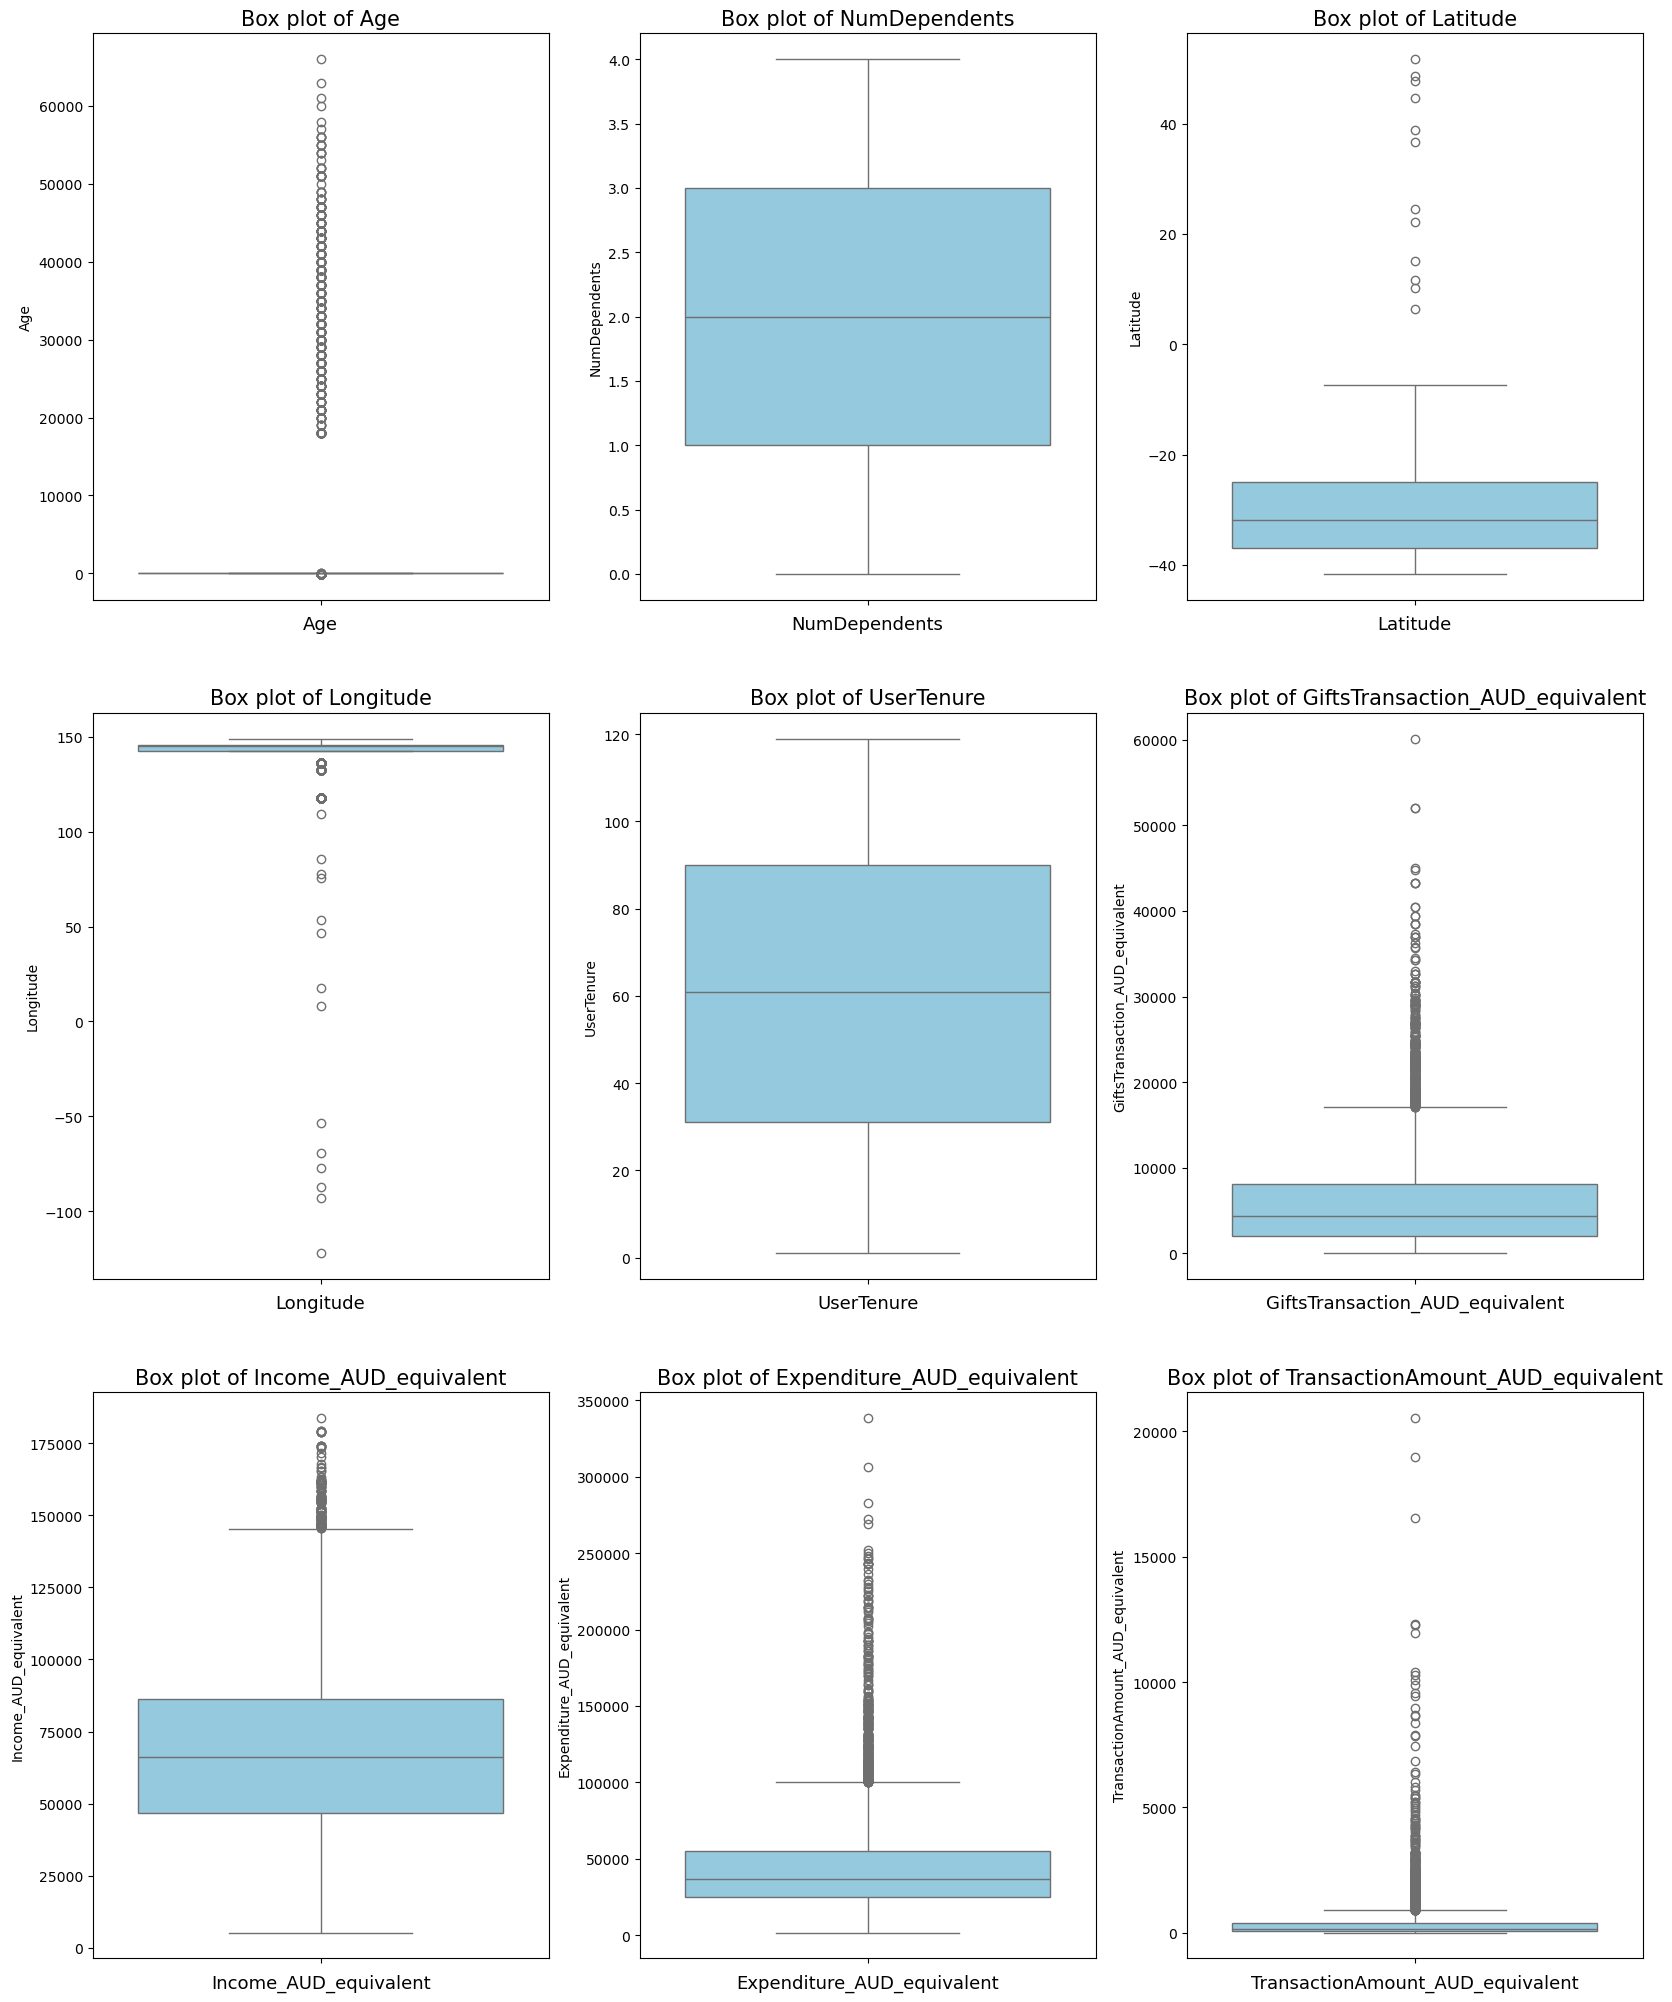

In [64]:
# Detect outliers 
plt.figure(figsize=(20,25))

# List of columns to plot
columns1 = ['Age', 'NumDependents', 'Latitude', 'Longitude', 'UserTenure', 'GiftsTransaction_AUD_equivalent', 'Income_AUD_equivalent', 'Expenditure_AUD_equivalent', 'TransactionAmount_AUD_equivalent']

# Loop through each column and create a boxplot
for i, col in enumerate(columns1):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=df_test[col], color="skyblue")
    plt.xlabel(col, size=13)
    plt.title(f"Box plot of {col}", size=15)

#### Handling outliers of test data

# II. Models

## 1. Random Forest

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [69]:
X = df.drop(['IsFraud','TransactionDate','TransactionTime',"TransactionNumber", "UserID", "MerchantID", "EmailDomain"], axis=1)
y = df['IsFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 8, stratify = y)
rfr = RandomForestClassifier (random_state=123)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)


In [70]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (8738, 33)
Training Labels Shape: (8738,)
Testing Features Shape: (2185, 33)
Testing Labels Shape: (2185,)


In [71]:
confusion_matrix(y_test, y_pred)

array([[1380,    8],
       [ 351,  446]], dtype=int64)

TN (True Negatives): 1380 - The number of negative instances correctly classified by the model (not a fraud)
FP (False Positives): 8 - The number of negative instances incorrectly classified as positive (8 frauds wrongly label as normal )
FN (False Negatives): 351 - The number of positive instances incorrectly classified as negative (351 normal wrongly label as frauds)
TP (True Positives): 446 - The number of positive instances correctly classified by the model (446 frauds)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1388
           1       0.98      0.56      0.71       797

    accuracy                           0.84      2185
   macro avg       0.89      0.78      0.80      2185
weighted avg       0.86      0.84      0.82      2185



In [74]:
# Build random forest model with hyperparameters
# Number of decision trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]

# Number of features to consider at every split
max_features = ['auto','sqrt']

# Max number of levels in tree
max_depth = [2,4]

#Min samples required to split a node
min_sam_split = [2,5]

#Min sam require at each leaf node
min_sample_leaf = [1,2]

#Method of selecting samples for training each tree
bootstrap = [True,False]


# the random grid

param_grid ={
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_sam_split,
    'min_samples_leaf': min_sample_leaf,
    'bootstrap': bootstrap
}

from sklearn.model_selection import GridSearchCV

rfr_cv = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=3, verbose=2, n_jobs=4)

rfr_cv.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
362 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ADMIN\anaconda3\Lib\site-packag

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [75]:
#best = rfr_cv.best_params_
#print(best)

In [76]:
#print(f'Best score: {rfr_cv.best_score_}')

#Best score la z=))

In [77]:
rfr_cv

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1388
           1       0.98      0.56      0.71       797

    accuracy                           0.84      2185
   macro avg       0.89      0.78      0.80      2185
weighted avg       0.86      0.84      0.82      2185



In [79]:
X_test = df_test.drop(['TransactionDate','TransactionTime',"TransactionNumber", "UserID", "MerchantID", "EmailDomain"], axis=1)

y_pred = rfr.predict(X_test)

In [146]:
result = pd.DataFrame(y_pred)
df_result_final = df_test.join([result])

,TransactionNumber,UserID,Age,EducationLevel,NumDependents,TransactionDate,TransactionTime,MerchantID,Latitude,Longitude,...,TransactionType_Transfer,TransactionType_Withdrawal,GiftsTransaction_AUD_equivalent,Income_AUD_equivalent,Expenditure_AUD_equivalent,TransactionAmount_AUD_equivalent,Year,Month,Day,0
0,11854,963,35,1,4,2023-09-08,23:59:59,M005,-37.020100,144.964600,...,0,0,5300.0164,53733.41,29296.02,225.64,2023,9,8,0
1,2647,1693,23,2,2,2023-08-05,08:23:18,M003,-37.020100,144.964600,...,0,0,1881.5216,54856.77,34628.31,658.10,2023,8,5,0
2,5945,4383,44,1,2,2023-03-05,08:15:15,M004,-30.000233,136.209152,...,0,0,3849.8320,59011.72,33312.46,133.59,2023,3,5,0
3,6798,1350,40,0,3,2023-05-23,17:51:01,M008,-37.020100,144.964600,...,0,1,18651.7128,128795.40,67049.00,6.74,2023,5,23,1
4,12985,4145,18,1,3,2023-11-04,19:32:17,M008,-20.917574,142.702789,...,1,0,3405.9900,44506.03,22856.31,15.67,2023,11,4,0


In [148]:
df_result_final.to_csv("df_result_final.csv")